# Data Analysis

Load the packages.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Read the data.

In [8]:
data = pd.read_csv("data/data.csv", sep=";")

Analyze market return.

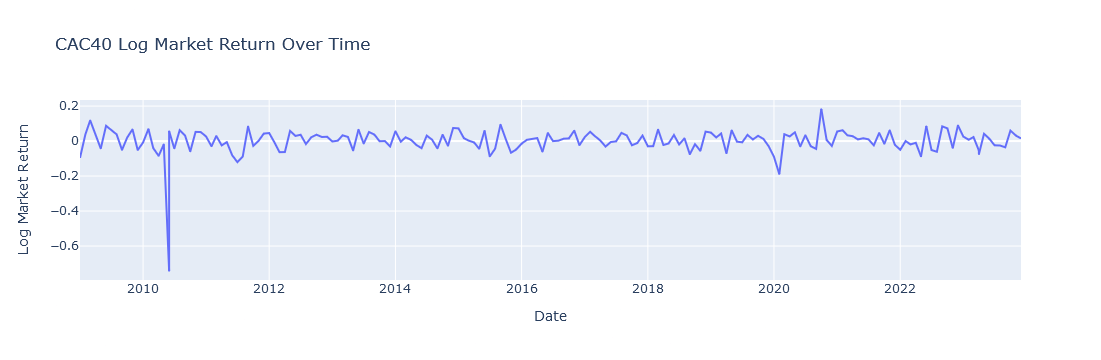

In [22]:
cac40 = data.drop_duplicates(subset=["Log Market Return"])
cac40 = cac40.sort_values(by="Date")
cac40["Date"] = pd.to_datetime(cac40["Date"]).dt.strftime("%Y-%m")

graph = px.line(cac40, x="Date", y="Log Market Return", title="CAC40 Log Market Return Over Time")
graph.show()

## OLS Regression

Import packages.

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

Install the packages if necessary.

In [46]:
# %pip install statsmodels
# %pip install linearmodels

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.7 MB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 2.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 2.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.7 MB 3.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.7 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.1/1.7 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.5/1.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.6 MB/s eta 0:00:00
   --------------------------

In [69]:
df = pd.read_csv("data/data.csv", sep=";")
df["Excess Return"] = df["Log Return"] - df["Log Market Return"]
df["Market Excess Return"] = df["Log Market Return"] - df["Log Risk-Free Return"]
df["Date"]= pd.to_datetime(df["Date"])
df = df.set_index(["Ticker", "Date"])

df["Intercept"] = 1

dependent = df["Excess Return"]
independent = df[["Market Excess Return", "Intercept"]] 

model = PanelOLS(dependent, independent, entity_effects=True)

results = model.fit()

print(results.summary)

C:\Users\Admin\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:          Excess Return   R-squared:                     2.501e-07
Estimator:                   PanelOLS   R-squared (Between):             -0.0005
No. Observations:                6817   R-squared (Within):            2.501e-07
Date:                Fri, Dec 20 2024   R-squared (Overall):           4.195e-07
Time:                        22:45:26   Log-likelihood                    8702.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.0017
Entities:                          40   P-value                           0.9672
Avg Obs:                       170.43   Distribution:                  F(1,6776)
Min Obs:                       9.0000                                           
Max Obs:                       175.00   F-statistic (robust):             0.0017
                            

In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

df = pd.read_csv("data/data.csv", sep=";")
df["Excess Return"] = df["Log Return"] - df["Log Market Return"]
df["Market Excess Return"] = df["Log Market Return"] - df["Log Risk-Free Return"]
df["Date"]= pd.to_datetime(df["Date"])
df = df.set_index(["Ticker", "Date"])

df["Intercept"] = 1

dependent = df["Excess Return"]
independent = df[[
    "Market Excess Return", 
    "Log Inflation", 
    "Log IPI", 
    "Log USD/EUR", 
    "Intercept"
]]

model = PanelOLS(dependent, independent, entity_effects=True)
results = model.fit()

print(results.summary)

C:\Users\Admin\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:          Excess Return   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):              0.0010
No. Observations:                6817   R-squared (Within):               0.0019
Date:                Fri, Dec 20 2024   R-squared (Overall):              0.0019
Time:                        22:54:29   Log-likelihood                    8709.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.2071
Entities:                          40   P-value                           0.0122
Avg Obs:                       170.43   Distribution:                  F(4,6773)
Min Obs:                       9.0000                                           
Max Obs:                       175.00   F-statistic (robust):             3.2071
                            